# (Titanic Train Classification Task)

Name : Simant Pokhrel

Uni Id : 2065880

##Data Understanding

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
titanic_train_df = pd.read_csv('/content/drive/MyDrive/13 (1).csv')


In [10]:
len(titanic_train_df)

891

**View the data using head function which returns top rows**

In [11]:
titanic_train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


In [12]:
titanic_train_df.index

RangeIndex(start=0, stop=891, step=1)

In [13]:
titanic_train_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Survived'],
      dtype='object')

In [14]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [15]:
titanic_train_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [16]:
titanic_train_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<h1>Exploratory Data Analysis</h1>



<h2>Survived</h2>

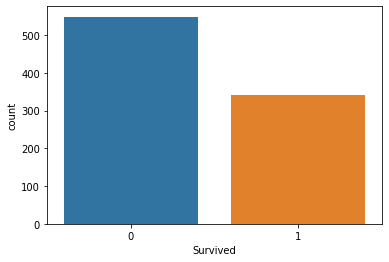

In [17]:

sns.countplot(x='Survived',data=titanic_train_df)

<p>A quick plot count to glance the rough ratio of survivor and victim </p>
    

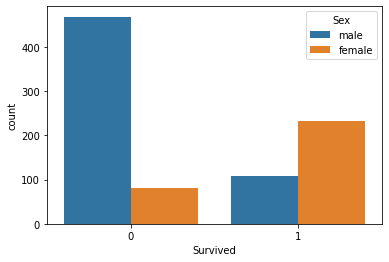

In [18]:
sns.countplot(x='Survived',data=titanic_train_df, hue='Sex')

In [19]:
#Check for null

In [20]:
titanic_train_df.isna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,True,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False


<p>Separating survival data with genders by adding hue. </p>
<br>
<h2>Sex</h2>
<p>Lets try seeing the initial passenger data based on gender proportion</p>

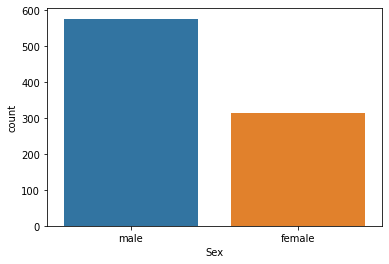

In [21]:
sns.countplot(x='Sex',data=titanic_train_df) 

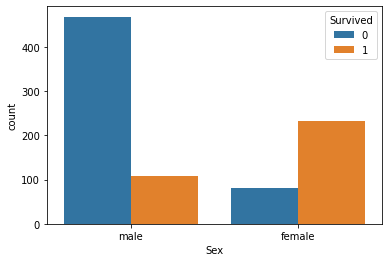

In [22]:
sns.countplot(x='Sex',data=titanic_train_df, hue='Survived')


<p>Adding hue to survival status, we see male passengers are way more likely to not survive</p>
<br>
<h2>Passenger Class</h2>
<p>Lets try to separate them based on Passenger class data</p>

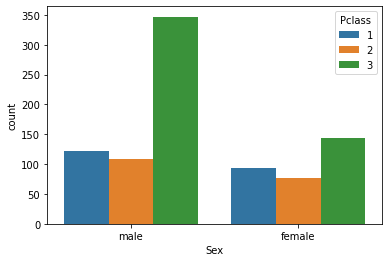

In [23]:
sns.countplot(x='Sex',data=titanic_train_df, hue='Pclass')

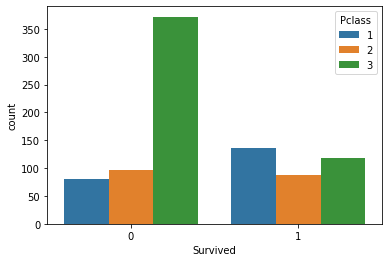

In [24]:
sns.countplot(x='Survived',data=titanic_train_df, hue='Pclass')

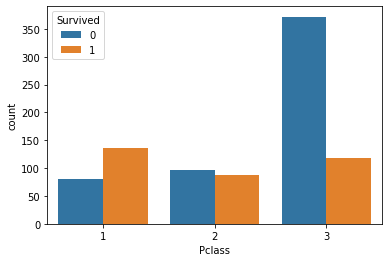

In [25]:
sns.countplot(x='Pclass',data=titanic_train_df, hue='Survived')

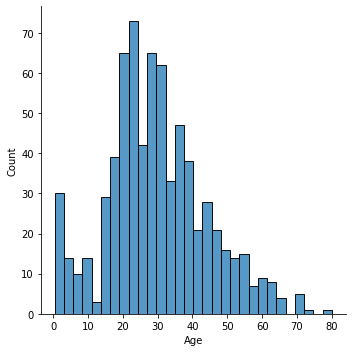

In [26]:
sns.displot(titanic_train_df['Age'].dropna(),kde=False,bins=30)

<p>We observe a Normal Distribution curve, with Mean in between 20-30.</p>


In [27]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


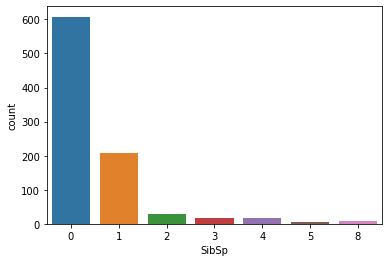

In [28]:
sns.countplot(x="SibSp",data=titanic_train_df)

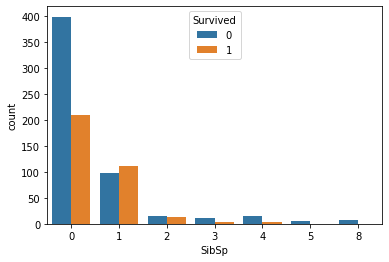

In [29]:
sns.countplot(x="SibSp",data=titanic_train_df,hue="Survived")

<p>Small observation that people with only 1 spouse/siblings has higher survival ratio than other SibSp category</p>

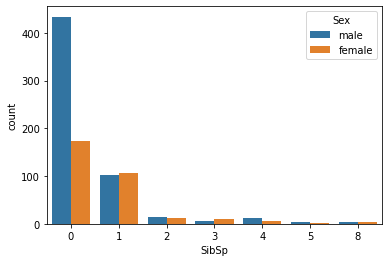

In [30]:
sns.countplot(x="SibSp",data=titanic_train_df,hue="Sex")

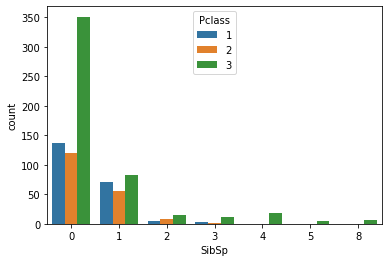

In [31]:
sns.countplot(x="SibSp",data=titanic_train_df,hue="Pclass")

<p> The data above prove the hypothesis that the high number of 0 SibSp is probably related to the high level of males in the third class passengers.</p>
<br>
<p>Lets try to see distribution of fare people pay to get on board.</p>

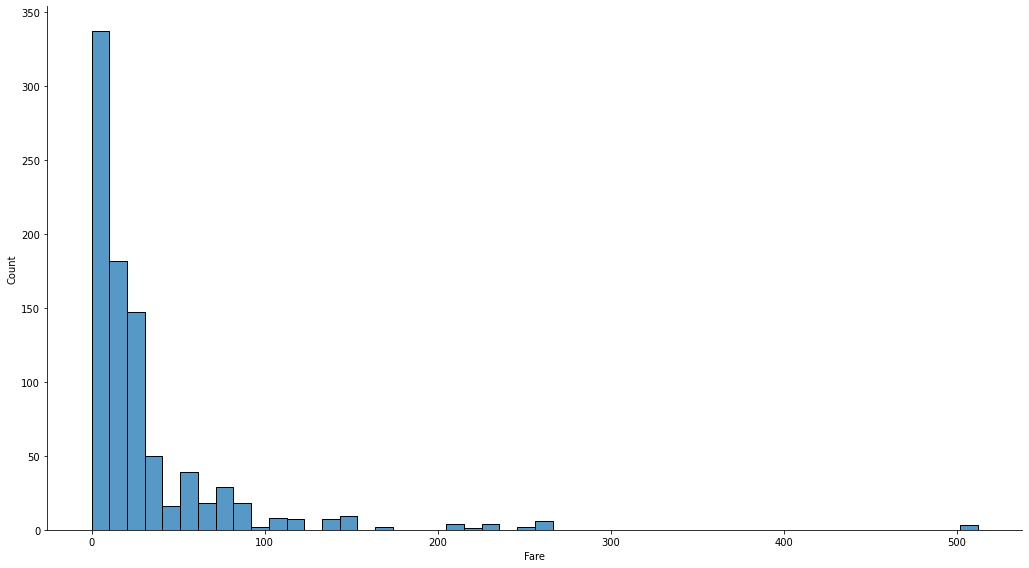

In [32]:

sns.displot(titanic_train_df['Fare'].dropna(),kde=False,bins=50,height=8,aspect=1.8)

<p>Majority of Titanic passengers pay the cheapest fare, which falls under the first bin.</p>

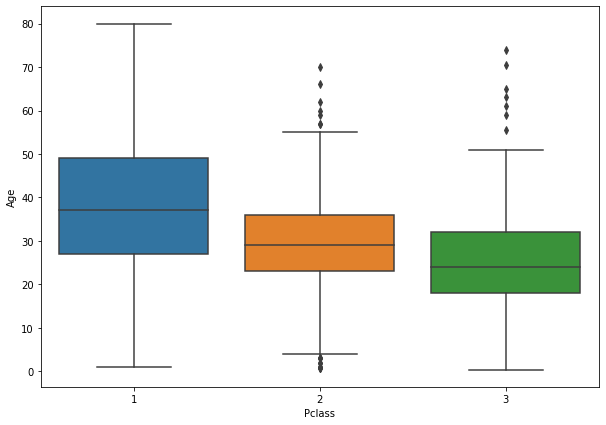

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train_df)

<p>Each passenger class has different age spread, probably due to wealthier passengers were usually older.</p>
<p>Now we are ready to impute by making a function</p>

In [34]:
pclass_age_mean = titanic_train_df.groupby('Pclass')['Age'].mean()
print(pclass_age_mean)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [35]:
def impute_age(cols):
    Age = cols[0] #1st column
    Pclass=cols[1] #2nd column
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [36]:
titanic_train_df['Age'] = titanic_train_df[['Age','Pclass']].apply(impute_age,axis=1)

<p>The Age data has now been cleaned, as we had imputed the nulls with average age of respective passenger classes</p>
<br>

<p>We will also write imputation method for Fare, as it is needed for the test data</p>
<br>

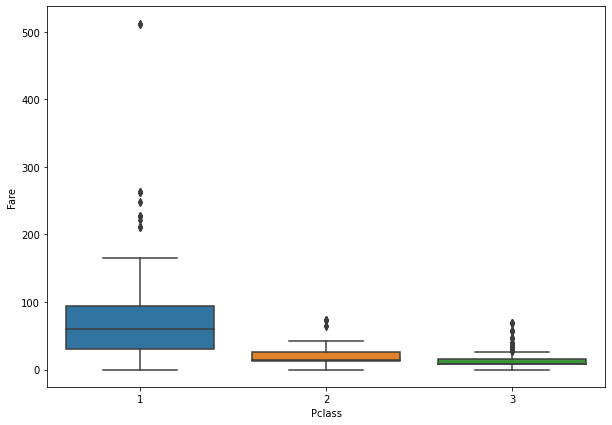

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Fare',data=titanic_train_df)

In [38]:
pclass_fare_mean = titanic_train_df.groupby('Pclass')['Fare'].mean()
print(pclass_fare_mean)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


impute average age values to null age values:

In [39]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

call the function

In [40]:
titanic_train_df["Age"] = titanic_train_df[["Age", "Pclass"]].apply(add_age,axis=1)

We have lots of null values for Cabin column, so we just remove it.

In [41]:
titanic_train_df.drop("Cabin",inplace=True,axis=1)

Finally, we remove some rows with null values:

In [42]:
titanic_train_df.dropna(inplace=True)

In [43]:
pd.get_dummies(titanic_train_df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


<p>One of the two columns above is redundant because we only need one column to identify sex. Having two columns will introduce multicollinearity, as the two columns are perfect predictors of each other.</p>

In [44]:
sex = pd.get_dummies(titanic_train_df['Sex'],drop_first=True)

In [45]:
embarked = pd.get_dummies(titanic_train_df["Embarked"],drop_first=True)
pclass = pd.get_dummies(titanic_train_df["Pclass"],drop_first=True)

We add these variables to the dataset:

In [46]:
train = pd.concat([titanic_train_df,pclass,sex,embarked],axis=1)

Then, we remove some columns that we are not going to use for our model.

In [47]:
titanic_train_df.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)

In [48]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,2,3,male,Q,S
0,3,male,22.0,1,0,7.2500,S,0,0,1,1,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0
2,3,female,26.0,0,0,7.9250,S,1,0,1,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,0,1,1,0,1


<p>We also need to convert Pclass into dummy variables as well. We will do that later</p>

# LOGISTIC REGRESSION

In [67]:
X= titanic_train_df.drop('Survived',axis=1)
y=titanic_train_df['Survived']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression(max_iter=10000)

In [54]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

# Prediction

In [55]:
predictions = logmodel.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       163
           1       0.73      0.26      0.38       104

    accuracy                           0.67       267
   macro avg       0.70      0.60      0.58       267
weighted avg       0.69      0.67      0.62       267



In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test,predictions)

array([[153,  10],
       [ 77,  27]])

In [60]:
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])


Time to get the real test dataset csv file from. [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

<h1>Evaluation</h1>

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       163
           1       0.73      0.26      0.38       104

    accuracy                           0.67       267
   macro avg       0.70      0.60      0.58       267
weighted avg       0.69      0.67      0.62       267



# Accuracy

In [63]:
from sklearn.metrics import accuracy_score

In [64]:

accuracy = accuracy_score(predictions, y_test)

print(f"The accuracy on test set using Logistic Regression is: {np.round(accuracy, 3)*100.0}%")

The accuracy on test set using Logistic Regression is: 67.4%


# Confusion Matrix

In [65]:
confusion_matrix(y_test, predictions)

array([[153,  10],
       [ 77,  27]])

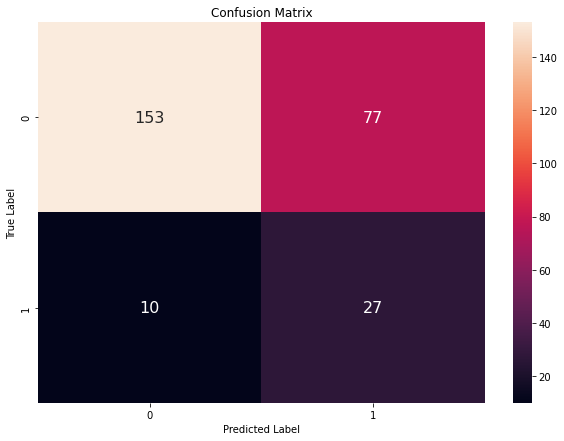

In [66]:


conf_mat = pd.DataFrame(confusion_matrix(predictions, y_test))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Conclusion

The accuracy on test set using Logistic Regression is: 67.4% and the confusion matrix has been ploted.